# Key Takeaways: A Guided EDA Process 🚀🔍

1. **Understand Column Meanings:** Begin by comprehending the meaning of each column in your dataset. Know what each attribute represents and its significance in your analysis. This provides context for your data.

2. **Check Data Integrity:** Ensure the integrity of your dataset by inspecting for missing values (NaNs) and outliers. Addressing data quality issues is crucial to reliable analysis.

3. **Visualize Distributions:** Utilize data visualization techniques to explore the distribution of individual variables. Tools like histograms, kernel density plots, and box plots can reveal insights into the data's spread and central tendencies.

4. **Pair Plots for Relationships:** Create pair plots to visualize relationships between pairs of variables. This matrix of scatter plots helps identify correlations and patterns, aiding in understanding the data's structure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests

In [2]:
titanic_df = sns.load_dataset('titanic')

# Exploratory data analysis (EDA)

## 1. Understanding the Titanic Dataset 🚢👥

In [3]:
titanic_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In the Titanic dataset, each column represents a different attribute or characteristic related to the passengers aboard the Titanic. Let's explore the meaning of each column to gain a better understanding:

- **survived:** The 'survived' column is binary, with '1' indicating that a passenger survived the Titanic disaster and '0' indicating that they did not. It represents the survival outcome of passengers.

- **pclass:** 'Pclass' refers to the passenger class, categorized as 1st, 2nd, or 3rd class. It reflects the socio-economic status of passengers, with 1st class being the highest and 3rd class the lowest.

- **sex:** 'Sex' represents the gender of the passenger. It differentiates passengers into male and female categories.

- **age:** The 'age' column denotes the age of the passenger. It provides information about the passenger's age in years.

- **sibsp:** 'Sibsp' stands for the number of siblings or spouses aboard the Titanic with the passenger. It reflects the family relationships of passengers.

- **parch:** 'Parch' represents the number of parents or children aboard the Titanic with the passenger. It indicates family relationships beyond siblings or spouses.

- **fare:** 'Fare' denotes the ticket fare or price paid by the passenger for their Titanic journey. It reflects the cost of the ticket.

- **embarked:** 'Embarked' indicates the port of embarkation for the passenger, with three possible values: 'C' (Cherbourg), 'Q' (Queenstown), and 'S' (Southampton).

- **class:** 'Class' is similar to 'pclass' and represents the passenger class but in a different format. It categorizes passengers into classes 'First,' 'Second,' and 'Third.'

- **who:** 'Who' categorizes passengers into groups such as 'man,' 'woman,' or 'child,' providing insights into passenger demographics.

- **adult_male:** 'Adult_male' is a binary variable, with 'True' indicating that a passenger is an adult male and 'False' indicating otherwise. It provides additional information about the passenger's gender and age.

- **deck:** 'Deck' represents the deck or cabin level where a passenger's accommodation was located. It provides insights into passenger cabin assignments.

- **embark_town:** 'Embark_town' specifies the name of the town or city where the passenger embarked onto the Titanic.

- **alive:** Similar to 'survived,' 'alive' is binary, with 'yes' indicating that a passenger survived and 'no' indicating otherwise. It serves as an alternative representation of survival status.

- **alone:** 'Alone' is a binary variable, with 'True' indicating that a passenger was traveling alone (without siblings, spouses, parents, or children) and 'False' indicating otherwise. It provides information about passengers' solo travel status.

Understanding these columns is essential for analyzing the demographics, socio-economic status, and survival outcomes of Titanic passengers, making it possible to derive valuable insights from the dataset.

Let's have a look to the number of rows too!

In [4]:
print("Rows:",titanic_df.shape[0])

Rows: 891


## 2. Checking data integrity

In [5]:
# Count NaN values in the Iris dataset
nan_count = titanic_df.isna().sum()

# Display the count of NaN values for each column
print("NaN count in each column:")
print(nan_count)


NaN count in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


## Handling Missing Data in the Titanic Dataset 🧩📊

In data analysis, addressing missing data is crucial for ensuring the accuracy and reliability of insights drawn from a dataset. The Titanic dataset may contain missing values in various columns, and understanding the nature of these missing values is essential. Let's explore the different types of missingness and assess how they relate to the Titanic dataset:

### Types of Missingness:

1. **Missing Completely at Random (MCAR):** In this scenario, the missing values on a given variable (e.g., 'age') are not associated with other variables in the dataset or with the variable itself. Essentially, there is no discernible pattern or reason for the missing values. MCAR suggests that the absence of data is entirely random.

2. **Missing at Random (MAR):** MAR occurs when the missingness is not entirely random but can be explained or predicted by other variables in the dataset. This means that there are variables (e.g., 'class' or 'sex') where complete information is available, and the likelihood of missing data can be attributed to these variables. It's as if the presence of missing values is influenced by other known factors.

3. **Missing Not at Random (MNAR):** In MNAR situations, the missingness depends on unobserved data or the value of the missing data itself. In other words, there is a hidden pattern or mechanism causing certain values to be missing, and this pattern is not explained by the observed data alone.

These definitions help us categorize and understand the nature of missing data, which is essential for determining appropriate strategies to handle it effectively.

Now, let's take a closer look at the nullity matrix of the Titanic dataset to identify which type of missingness is present in the dataset. This analysis will guide our decisions on how to handle missing data in subsequent data preprocessing steps.


## Introduction to Missingno: Visualizing Missing Data in Python 🧩📊

Missing data is a common challenge in data analysis and machine learning. Understanding the distribution and patterns of missing values is essential for making informed decisions about data preprocessing and imputation. The Python library **Missingno** is a valuable tool for visualizing and analyzing missing data within your datasets.

### What is Missingno?

**Missingno** is an open-source Python library designed to help you visualize and analyze missing data patterns in your datasets. It offers several visualizations and tools to gain insights into the presence of missing values, including:

- **Matrix Plot:** A matrix plot provides a visual representation of missing values in the dataset, allowing you to identify patterns and areas with high or low missingness.

- **Bar Chart:** A bar chart displays the number of missing values for each column, providing an overview of missing data across attributes.

- **Heatmap:** A heatmap visualizes the correlation between missing values in pairs of columns, helping you identify relationships between missingness in different variables.

### Key Benefits of Using Missingno:

1. **Quick Assessment:** Missingno enables you to quickly assess the extent and distribution of missing values in your dataset, helping you understand data quality.

2. **Pattern Identification:** You can identify patterns of missingness, such as Missing Completely at Random (MCAR), Missing at Random (MAR), or Missing Not at Random (MNAR).

3. **Data Imputation:** By visualizing missing data, you can make informed decisions about data imputation techniques, such as mean, median, mode, or predictive modeling.

4. **Data Cleaning:** Missingno aids in data cleaning by highlighting columns with excessive missing values that may need to be removed or imputed.

In [6]:
import missingno as msno

<Axes: >

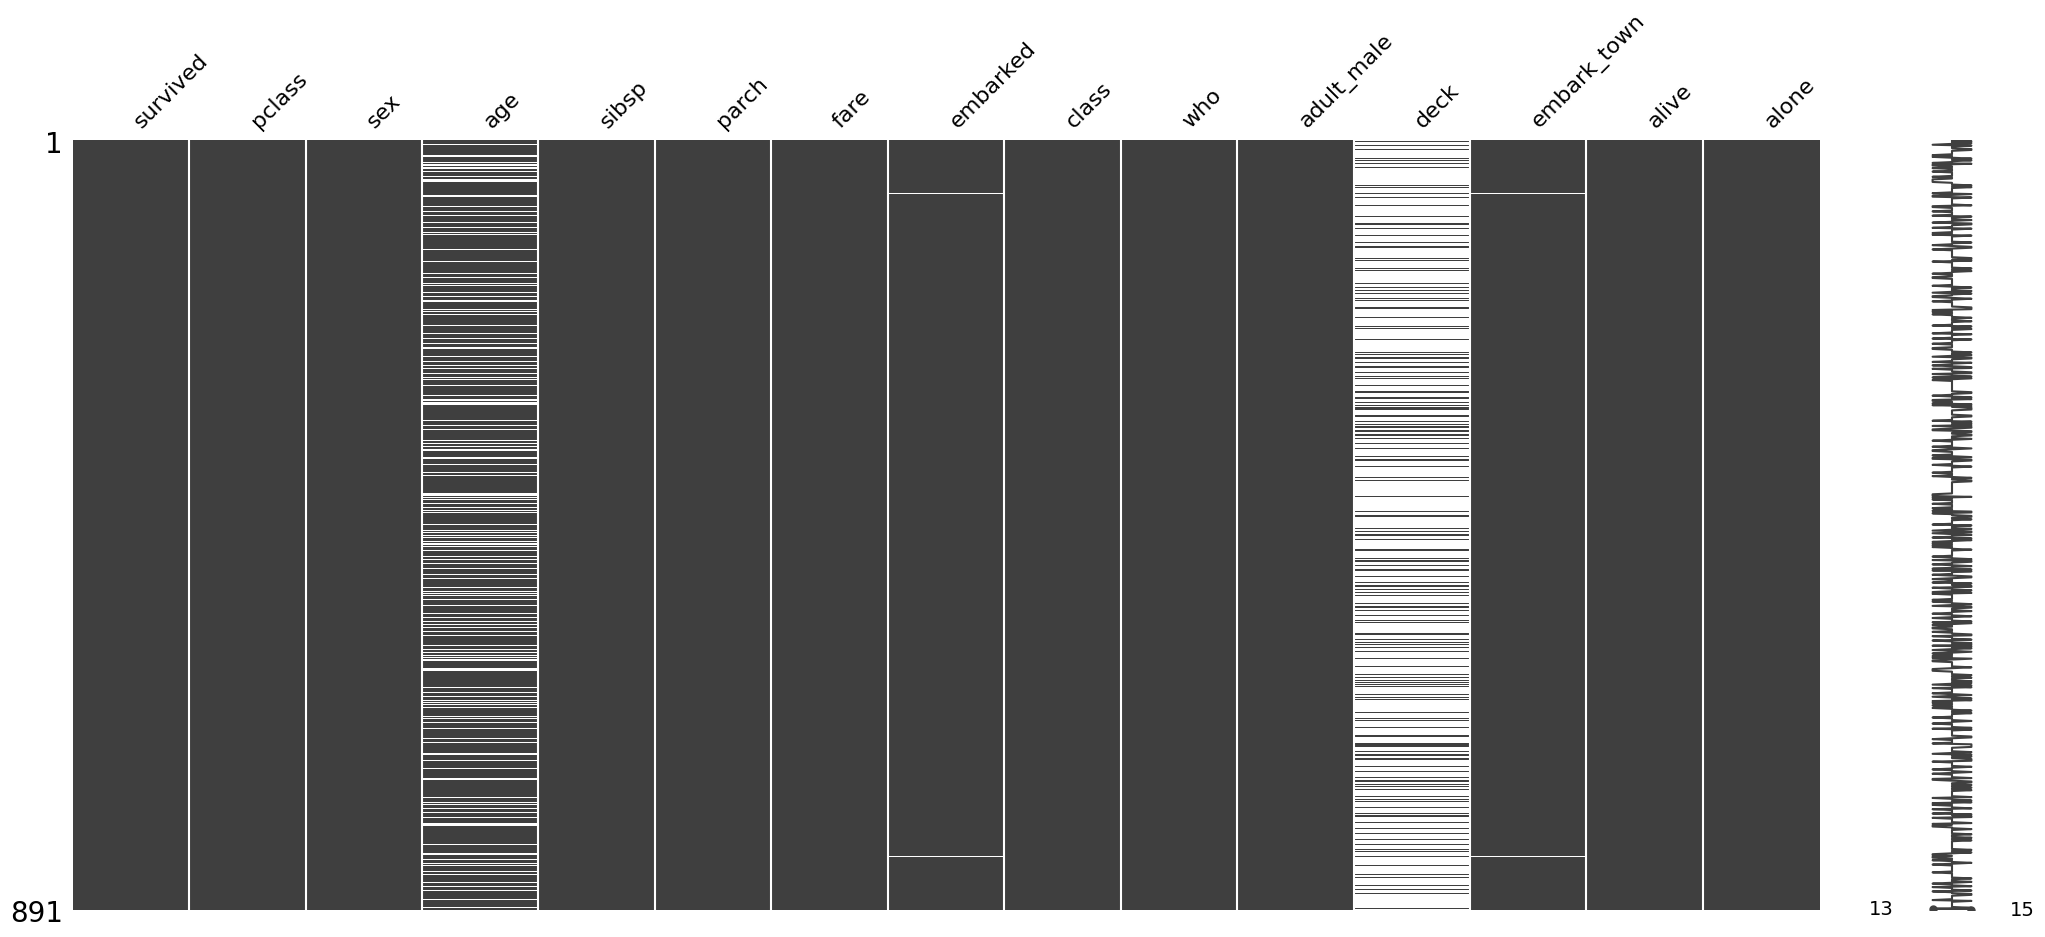

In [7]:
msno.matrix(titanic_df)

<Axes: >

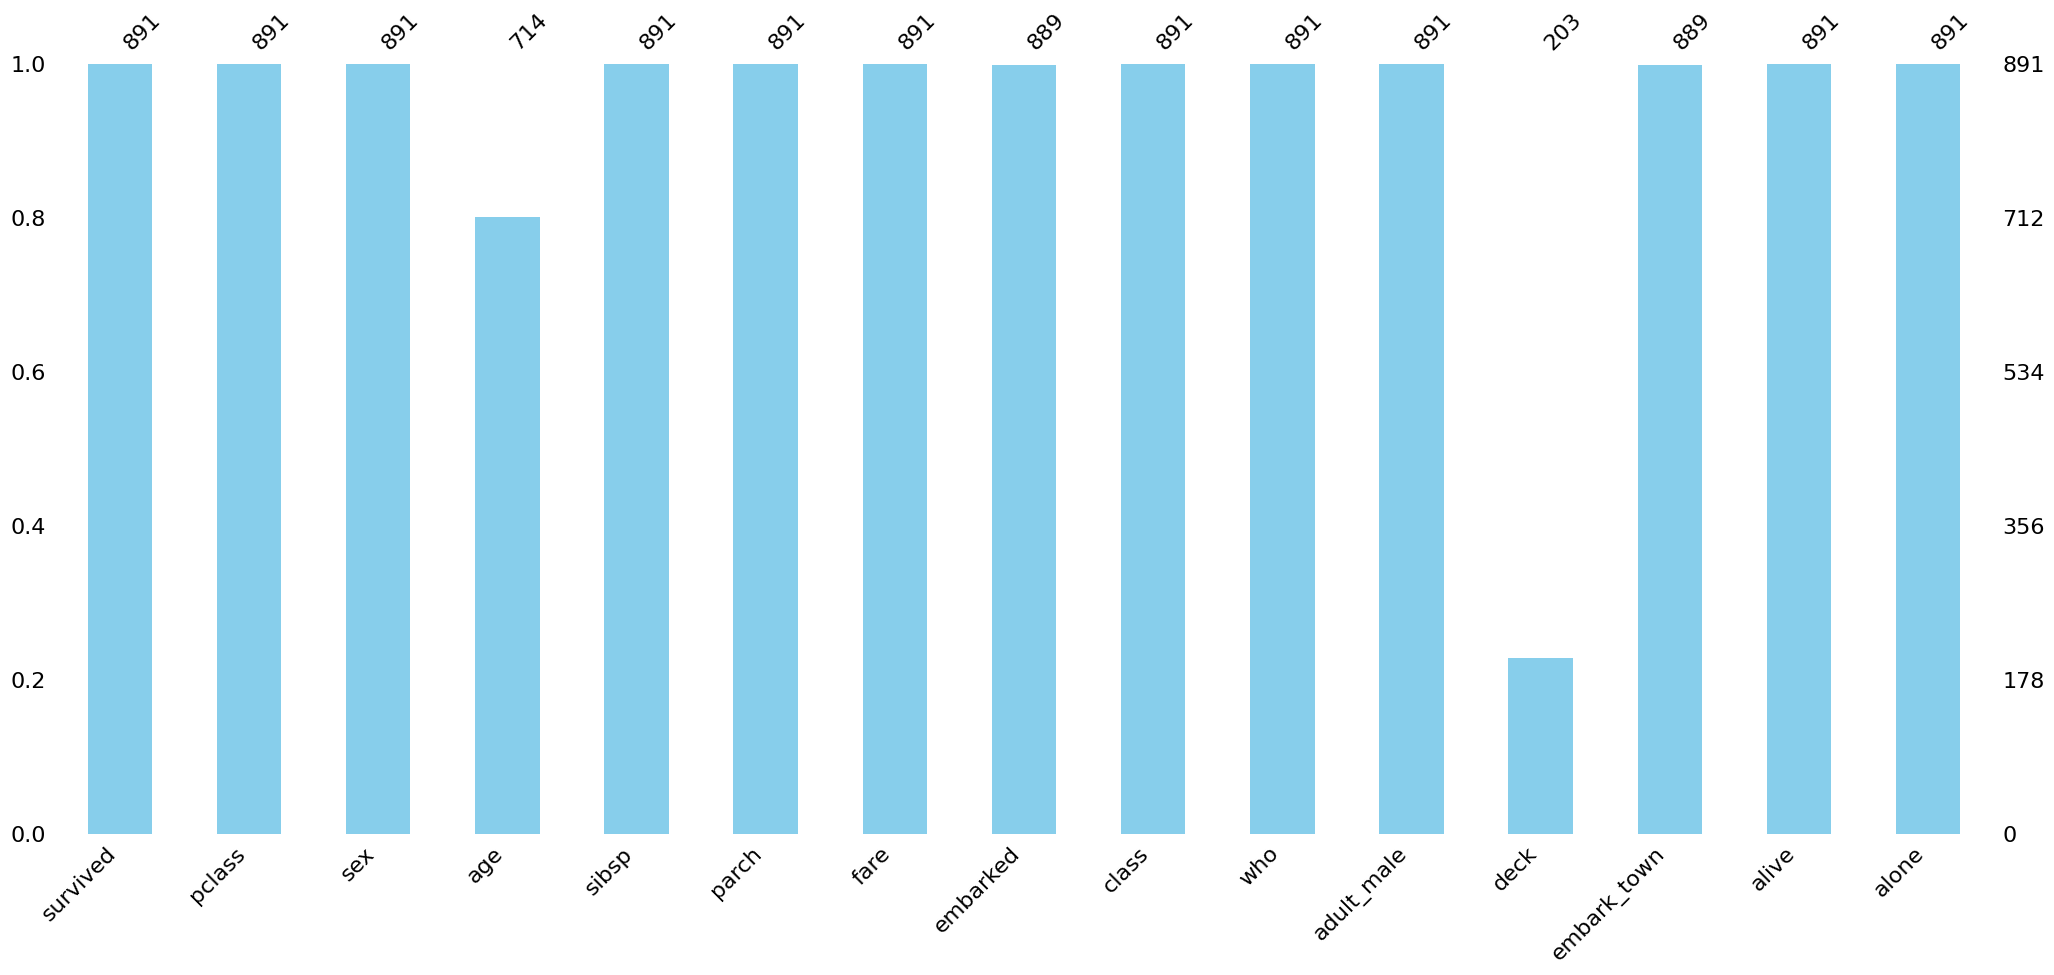

In [8]:
msno.bar(titanic_df, color='skyblue', labels=True)

/opt/homebrew/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

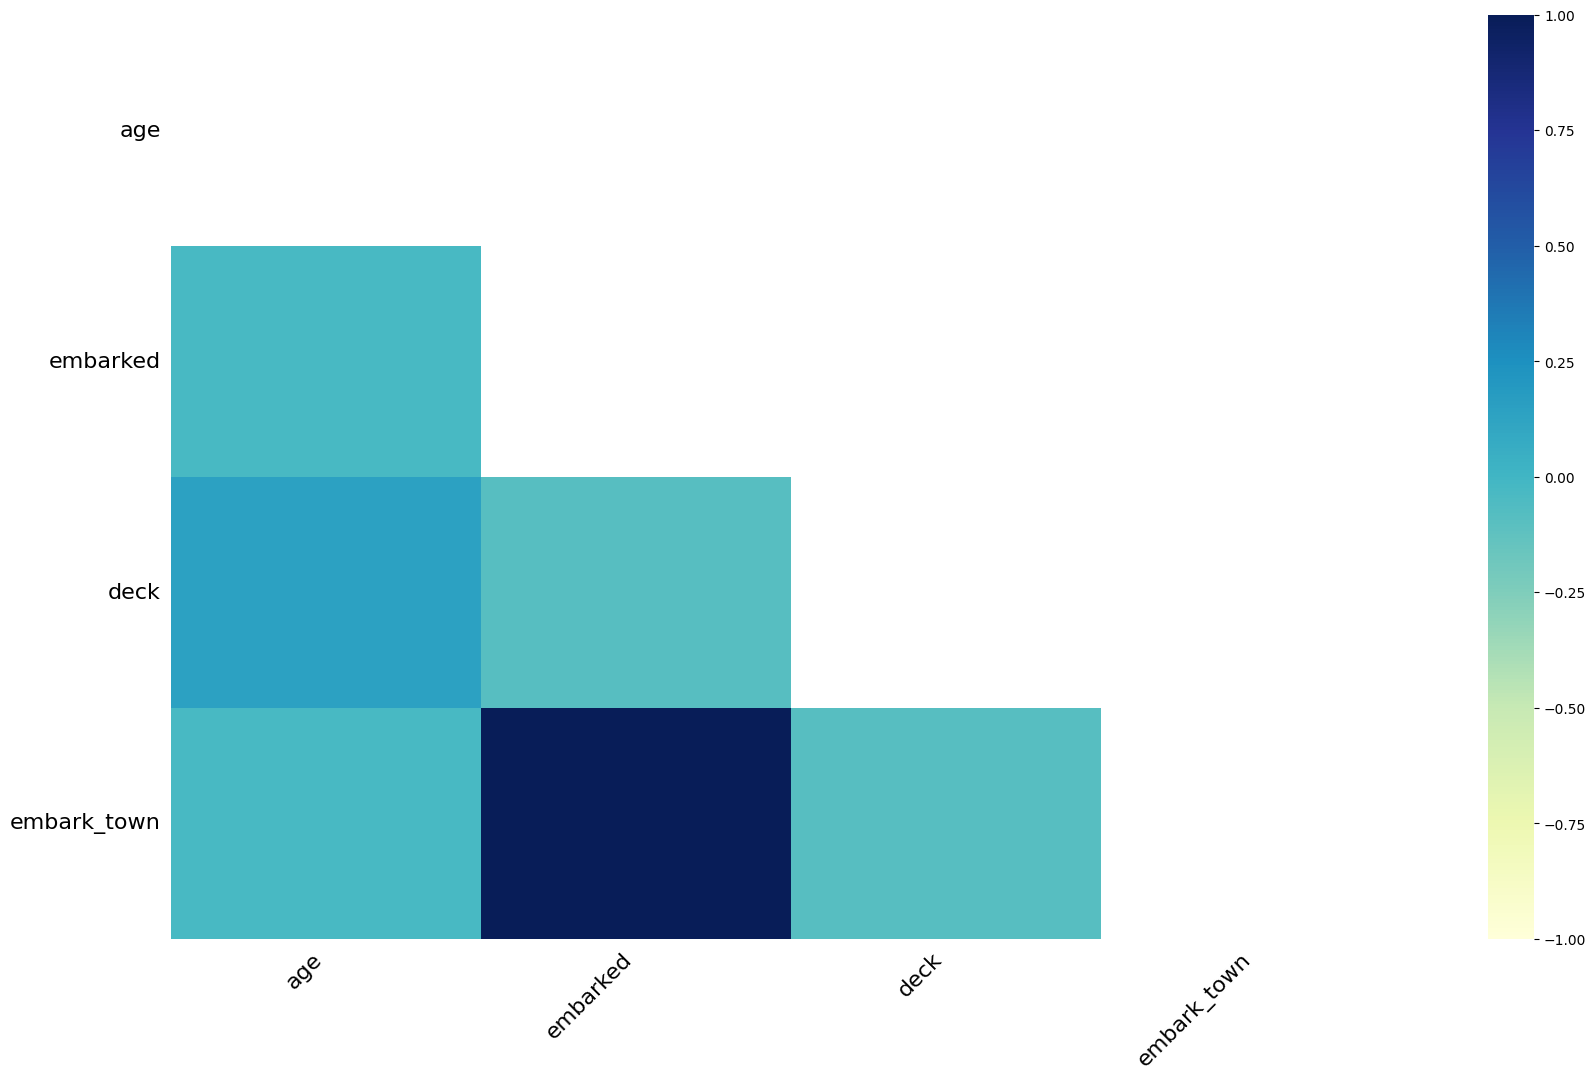

In [9]:
msno.heatmap(titanic_df, cmap='YlGnBu', labels=True)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(titanic_df)

### Investigating Missing Data in the 'deck' Column: Understanding the Patterns 🧩📊

In data analysis, understanding the nature and patterns of missing data is a critical step in ensuring the accuracy and reliability of insights drawn from a dataset. One common question that arises when dealing with missing data is whether the missingness is random or systematic.

#### The Goal: Assessing Randomness of Missing Values

The primary goal of this investigation is to assess whether the missing values in the 'deck' column of our dataset exhibit a random or non-random pattern. In particular, we aim to determine whether the absence of data in this column follows a specific structure or if it occurs entirely at random. Understanding this pattern can help us make informed decisions about how to handle missing data effectively.

#### Investigative Approach

To achieve our goal, we will follow these key steps:

1. **Distribution Analysis:** We will first analyze the distribution of missing values in the 'deck' column. This will involve creating visualizations that highlight the prevalence and patterns of missing data.

2. **Comparison of Distributions:** To gain deeper insights, we will compare the distributions of the dataset made up of rows with missing values in the 'deck' column against the distribution of the entire dataset. This comparison will reveal any differences in data patterns between the two subsets.

3. **Interpretation:** Based on our findings, we will interpret whether the missingness in the 'deck' column appears to be random or if there are discernible patterns or dependencies with other variables.

#### Why This Matters

Understanding the nature of missing data is crucial for several reasons:

- It guides our choices for data imputation techniques.
- It helps in deciding whether to exclude certain rows or columns with excessive missing values.
- It can reveal insights into data collection processes or potential biases in the dataset.

By conducting this investigation, we aim to ensure that our subsequent data analysis and modeling efforts are built on a solid understanding of the quality and patterns of missing data in the 'deck' column.

Let's begin our exploration and visualization of the missing data to uncover valuable insights.


/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

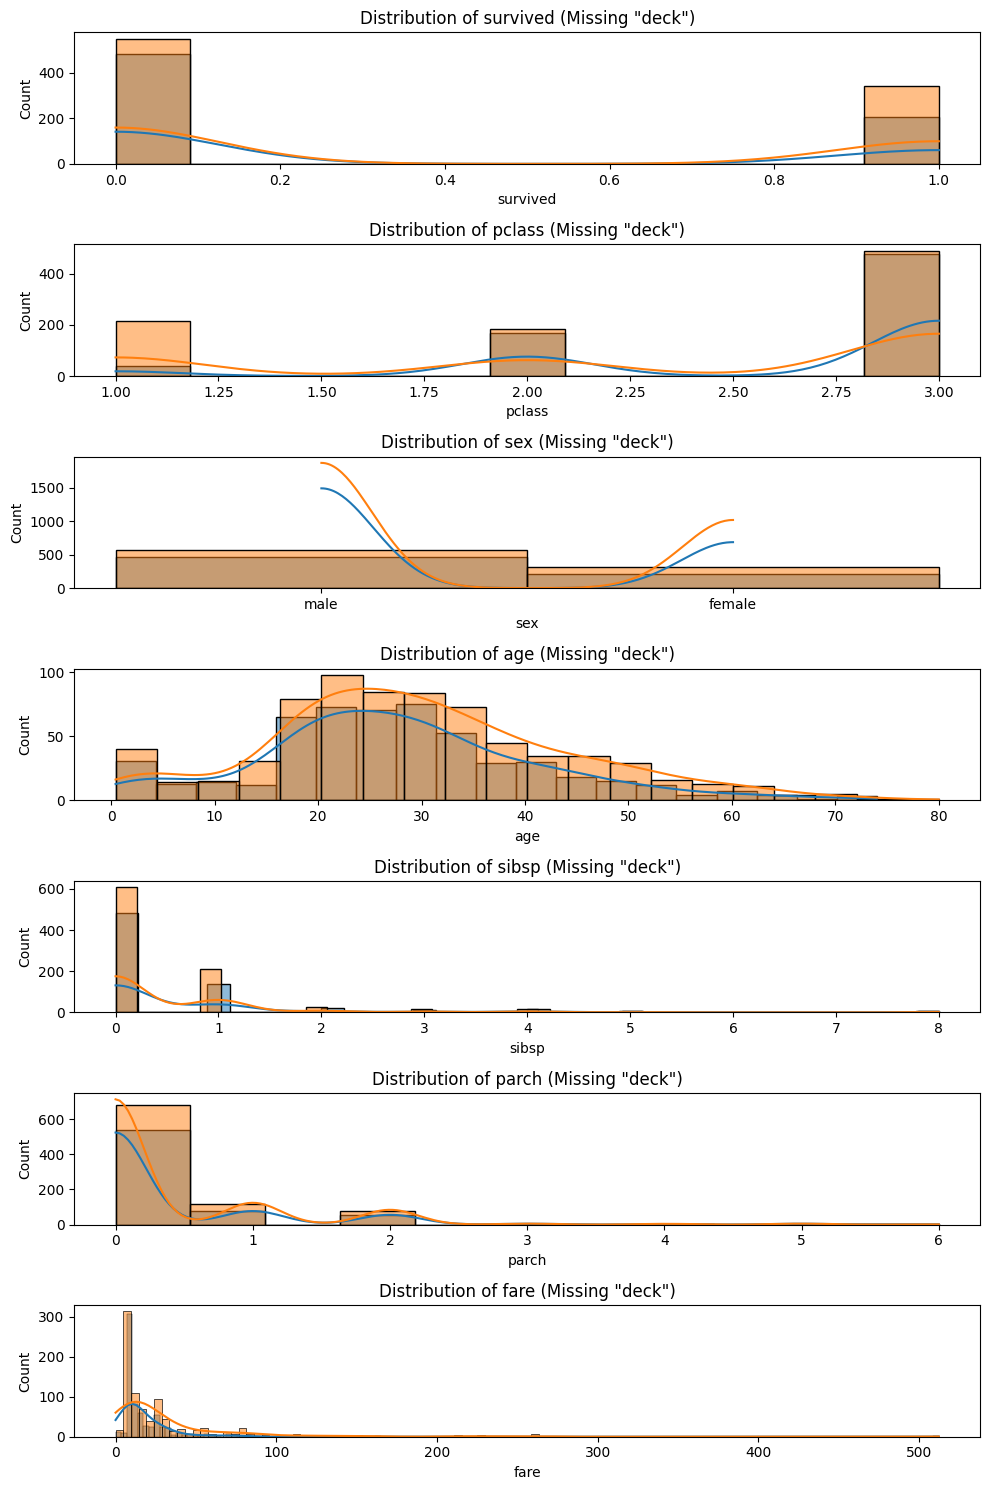

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'deck' is NaN
missing_deck_rows = titanic_df[titanic_df['deck'].isnull()]

# Select columns to create distribution plots
selected_columns = ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']

# Create a figure with subplots
fig, axes = plt.subplots(len(selected_columns), 1, figsize=(10, 15))

# Plot distribution plots for each selected column
for i, col in enumerate(selected_columns):
    sns.histplot(data=missing_deck_rows, x=col, ax=axes[i], kde=True)
    sns.histplot(data=titanic_df, x=col, ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col} (Missing "deck")')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()


#### Approach 1: Drop the data

In [11]:
# Approach 1a: Drop rows with missing 'deck' values
dropped_deck_rows = titanic_df.dropna(subset=['deck'])

# Calculate the number of rows dropped
rows_dropped = len(titanic_df) - len(dropped_deck_rows)

# Print the number of rows dropped
print(f"Number of Rows Dropped: {rows_dropped}")

Number of Rows Dropped: 688


In [12]:
# Approach 1b: Drop the 'deck' column
dropped_deck_column = titanic_df.drop('deck', axis=1)

#### Approach 2: Impute the data

In [13]:
from sklearn.impute import SimpleImputer

# Approach 2: Impute missing 'deck' values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
titanic_df_imputed = titanic_df.copy()
titanic_df_imputed['deck'] = imputer.fit_transform(titanic_df_imputed[['deck']])

# Check the number of missing values after imputation
missing_values_after_imputation = titanic_df_imputed['deck'].isnull().sum()

# Print the number of missing values after imputation
print(f"Number of Missing Values after Imputation: {missing_values_after_imputation}")


ValueError: 2

In this approach, we use the SimpleImputer from scikit-learn to impute missing 'deck' values with the most frequent value (mode). We then check and print the number of missing values in the 'deck' column after imputation.

Comparing the two approaches will help you understand the trade-offs between dropping rows with missing values and imputing those missing values.

### 3. Data distributions and correlations

/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

AttributeError: 'numpy.int64' object has no attribute 'startswith'

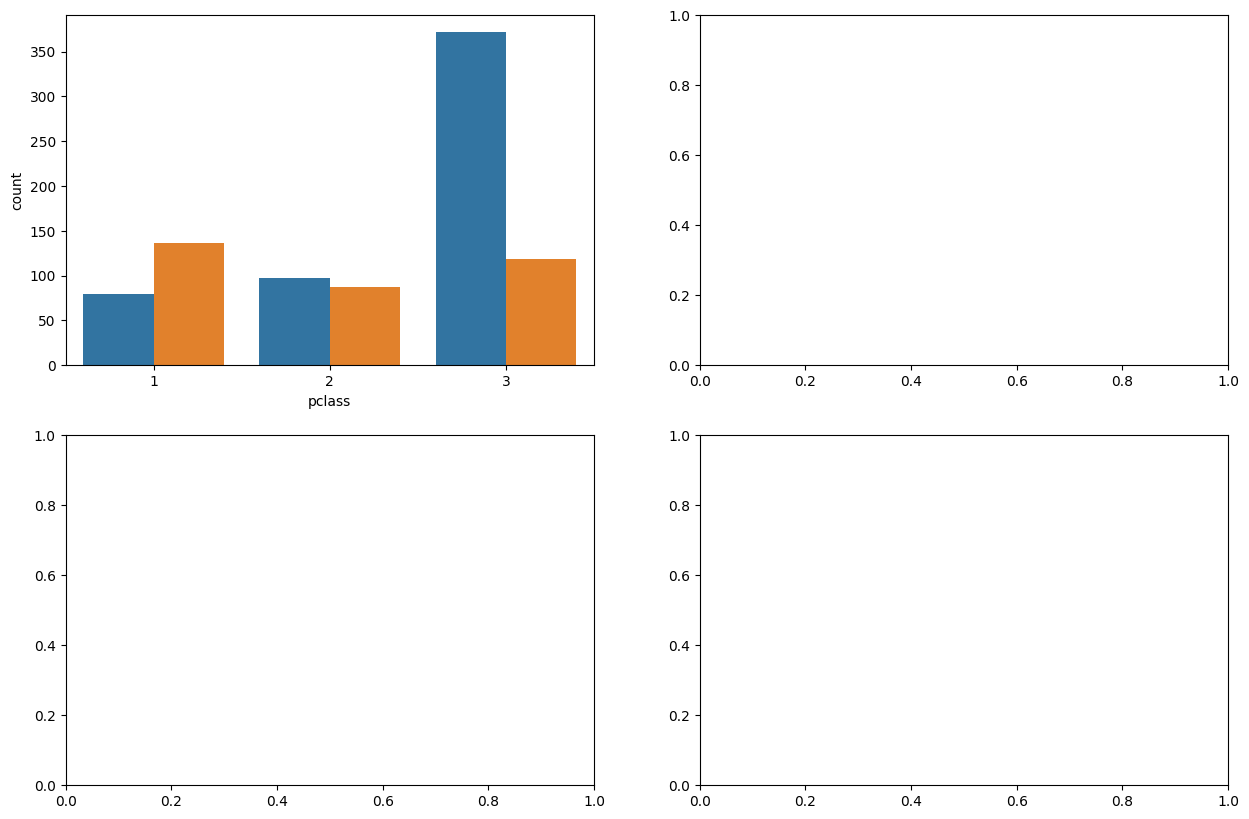

In [14]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Survival by Passenger Class (Pclass)
sns.countplot(x='pclass', hue='survived', data=titanic_df, ax=axes[0, 0])
axes[0, 0].set_title('Survival by Passenger Class (Pclass)')

# Plot 2: Survival by Gender (Sex)
sns.countplot(x='sex', hue='survived', data=titanic_df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender (Sex)')

# Plot 3: Survival by Number of Siblings/Spouses (SibSp)
sns.countplot(x='sibsp', hue='survived', data=titanic_df, ax=axes[1, 0])
axes[1, 0].set_title('Survival by Number of Siblings/Spouses (SibSp)')

# Plot 4: Survival by Number of Parents/Children (Parch)
sns.countplot(x='parch', hue='survived', data=titanic_df, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Number of Parents/Children (Parch)')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()


# Advanced use of Seaborn: FacetGrid 📊🔍

Seaborn is a powerful Python data visualization library that allows you to create informative and visually appealing plots. One of its advanced features is the **FacetGrid**, which enables you to create a grid of subplots for exploring complex relationships within your data.

### The FacetGrid Concept

The **FacetGrid** in Seaborn allows you to create a grid of subplots based on one or more categorical variables. Each subplot represents a subset of your data, making it an excellent choice for visualizing relationships between multiple variables or factors.

### Example: Box Plots with FacetGrid

Let's explore an example of using the FacetGrid to create box plots that visualize the relationships between passenger class ('pclass'), age ('age'), survival status ('survived'), and gender ('sex') in the Titanic dataset.


In [ ]:
# Create subplots for each age group
g = sns.FacetGrid(titanic_df, col='sex', height=4, col_wrap=3)

# Plot box plots within each age group, divided by 'survived' and 'pclass'
g.map(sns.boxplot, 'pclass', 'age', 'survived', palette='Set1', order=[1, 2, 3])

# Add labels and titles
g.set_axis_labels('Passenger Class', 'Age')
g.set_titles('Age Group: {col_name}')

# Adjust spacing between subplots for better readability
plt.tight_layout()

# Show the plots
plt.show()

## 4. Pair Plots for Relationships

In [ ]:
sns.pairplot(titanic_df, hue='survived')

In this case, the pair plor is quite messy. Better use the Heatmap!

In [ ]:
sns.heatmap(titanic_df.corr())